# Borderline-SMOTE

Borderline-SMOTE là một phương pháp oversampling trong xử lý dữ liệu mất cân bằng, nó tạo ra các mẫu mới bằng cách nội suy giữa các mẫu của lớp thiểu số và các hàng xóm gần nhất của chúng. Borderline-SMOTE không sử dụng tất cả các quan sát từ lớp thiểu số như SMOTE.

Borderline-SMOTE được phân thành hai biến thể chính:

Borderline-SMOTE (Variant 1): Tạo ra các mẫu mới giữa các mẫu trong nhóm Danger và hàng xóm gần nhất của lớp thiểu số.

Đầu tiên, Borderline-SMOTE xác định các mẫu từ lớp thiểu số mà hầu hết hàng xóm của chúng thuộc vào một lớp khác (được gọi là nhóm Danger).
Sau đó, nội suy được thực hiện giữa các mẫu trong nhóm Danger và các hàng xóm gần nhất của chúng từ lớp thiểu số. Quá trình này tạo ra các mẫu mới để cân bằng tỷ lệ giữa các lớp.
Borderline-SMOTE (Variant 2): Tạo ra các mẫu mới giữa các mẫu trong nhóm Danger và các hàng xóm từ cả lớp thiểu số và lớp đa số.

Tương tự như Variant 1, Borderline-SMOTE (Variant 2) xác định các mẫu từ lớp thiểu số thuộc vào nhóm Danger.
Thay vì chỉ sử dụng hàng xóm từ lớp thiểu số, Borderline-SMOTE (Variant 2) cũng sử dụng các hàng xóm từ cả lớp thiểu số và lớp đa số để nội suy và tạo ra các mẫu mới.
Cả hai biến thể của Borderline-SMOTE tập trung vào việc tạo ra các mẫu mới từ nhóm Danger, nghĩa là các mẫu gần ranh giới giữa các lớp. Điều này giúp tăng cường dữ liệu thiểu số trong các vùng quan trọng và cải thiện khả năng phân loại cho các thuật toán máy học.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from imblearn.over_sampling import BorderlineSMOTE

## Create data

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

We will create 2 classes, one majority one minority, clearly separated to facilitate the demonstration.

In [4]:
# Configuration options
blobs_random_seed = 42
centers = [(0, 0), (5, 5)]
cluster_std = 1.5
num_features_for_samples = 2
num_samples_total = 1600

# Generate X
X, y = make_blobs(
    n_samples=num_samples_total,
    centers=centers,
    n_features=num_features_for_samples,
    cluster_std=cluster_std)

# transform arrays to pandas formats
X = pd.DataFrame(X, columns=['VarA', 'VarB'])
y = pd.Series(y)

# create an imbalancced Xset
# (make blobs creates same number of obs per class
# we need to downsample manually)
X = pd.concat([
    X[y == 0],
    X[y == 1].sample(200, random_state=42)
], axis=0)

y = y.loc[X.index]

# display size
X.shape, y.shape

((1000, 2), (1000,))

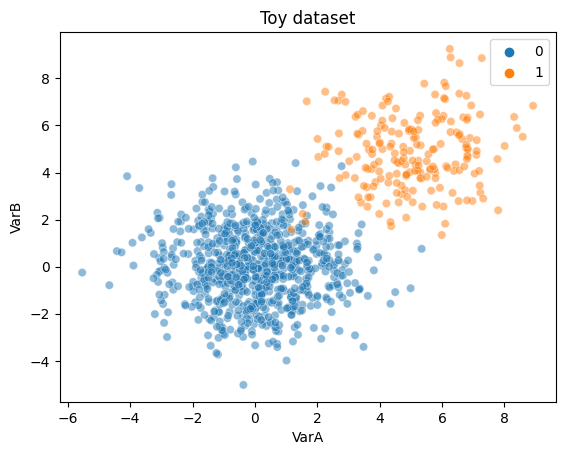

In [5]:
sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y, alpha=0.5
)

plt.title('Toy dataset')
plt.show()

## BorderlineSMOTE

[BorderlineSMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.BorderlineSMOTE.html)

In [6]:
sm_b1 = BorderlineSMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5, # the neighbours to crete the new examples
    m_neighbors=10, # the neiighbours to find the DANGER group
    kind='borderline-1',
    n_jobs=4
)

X_res_b1, y_res_b1 = sm_b1.fit_resample(X, y)

c:\Users\cbnn7\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [7]:
sm_b2 = BorderlineSMOTE(
    sampling_strategy='auto',  # samples only the minority class
    random_state=0,  # for reproducibility
    k_neighbors=5, # the neighbours to crete the new examples
    m_neighbors=10, # the neiighbours to find the DANGER group
    kind='borderline-2',
    n_jobs=4
)

X_res_b2, y_res_b2 = sm_b2.fit_resample(X, y)

c:\Users\cbnn7\AppData\Local\Programs\Python\Python310\lib\site-packages\imblearn\over_sampling\_smote\filter.py:192: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [8]:
# size of original data

X.shape, y.shape

((1000, 2), (1000,))

In [9]:
# size of undersampled data

X_res_b1.shape, y_res_b1.shape

((1600, 2), (1600,))

In [10]:
# size of undersampled data

X_res_b2.shape, y_res_b2.shape

((1599, 2), (1599,))

In [11]:
# number of minority class observations

y.value_counts(), y_res_b1.value_counts(), y_res_b2.value_counts()

(0    800
 1    200
 dtype: int64,
 0    800
 1    800
 dtype: int64,
 0    800
 1    799
 dtype: int64)

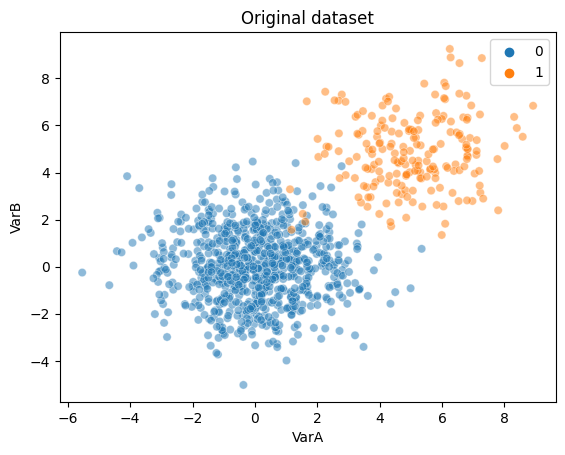

In [12]:
# plot of original data

sns.scatterplot(
    data=X, x="VarA", y="VarB", hue=y,alpha=0.5
)

plt.title('Original dataset')
plt.show()

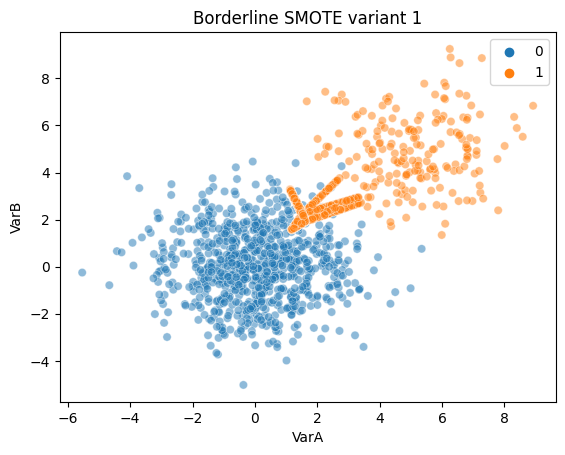

In [13]:

sns.scatterplot(
    data=X_res_b1, x="VarA", y="VarB", hue=y_res_b1, alpha=0.5
)

plt.title('Borderline SMOTE variant 1')
plt.show()

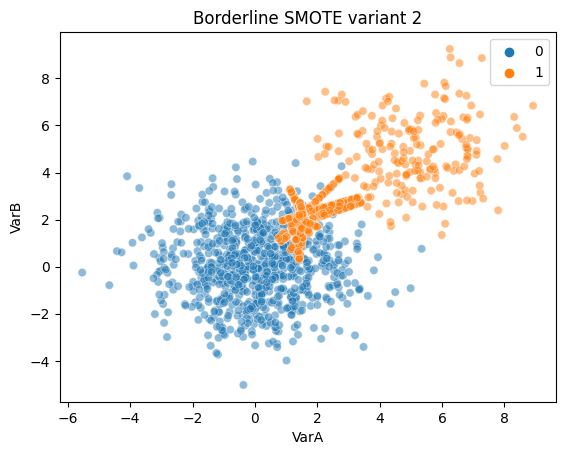

In [14]:

sns.scatterplot(
    data=X_res_b2, x="VarA", y="VarB", hue=y_res_b2, alpha=0.5
)

plt.title('Borderline SMOTE variant 2')
plt.show()